## 数据初始化
数据由CSMAR获取

In [1]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#导入数据  根据实际路径导入数据
sentiment = pd.read_excel(r"C:\apache\jupyter\金融计量\QX_ISI.xlsx",sheet_name = 'sheet1')
dividend = pd.read_excel(r"C:\apache\jupyter\金融计量\QX_DIVIDENDPREMIUM.xlsx",sheet_name = 'sheet1')
stock_rate = pd.read_excel(r"C:\apache\jupyter\金融计量\QX_STOCKRATE.xlsx",sheet_name = 'sheet1')

sentiment = sentiment[2:]
dividend = dividend[2:]
stock_rate = stock_rate[2:]
print(sentiment.head(5))
print(dividend.head(5))
print(stock_rate.head(5))

  SgnMonth    DCEF    RIPO NIPO    NA    TURN   CCI    ISI StdISI  \
2  2003-01 -0.1034   0.905  5.0  3.97  0.1054  97.5  26.44  -1.15   
3  2003-02 -0.1117  0.7691  3.0  2.85  0.1928  97.7   25.3  -0.95   
4  2003-03 -0.0941  0.6831  6.0  3.26  0.1328  97.8   26.2  -1.13   
5  2003-04 -0.1399  1.1853  5.0  5.69  0.1218  97.6  27.69  -1.01   
6  2003-05 -0.1892  1.0623  2.0  4.21  0.3197  88.7  24.05  -0.74   

  StdExMacroISI  
2         -1.17  
3         -0.95  
4         -1.19  
5         -0.96  
6         -0.74  
  SgnYear   Dnum  NDnum     DMB    NDMB    PDND LogPDND
2    2000  353.0  818.0  2.9219  3.6668 -0.7449 -0.0986
3    2001  777.0  470.0   2.316  3.0632 -0.7472 -0.1214
4    2003  679.0  688.0  1.3655  1.5618 -0.1963 -0.0583
5    2005  785.0  659.0  0.8572    0.91 -0.0528  -0.026
6    1997  215.0  599.0  2.1294  2.4667 -0.3373 -0.0639
  SgnYear     IPO APublic APrivate      Rs Refinance  Ashares     Bond  SRate
2    2005   57.63  278.78      0.0    2.62     281.4   339.03  

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#数据处理

sentiment['SgnYear'] = sentiment['SgnMonth'].apply(lambda x: x.split('-')[0])  
sentiment_sr = sentiment.join(stock_rate.set_index('SgnYear'),on = 'SgnYear',how = 'left')
sentiment_dividend_sr = sentiment_sr.join(dividend.set_index('SgnYear'),on = 'SgnYear',how = 'left' )
result = sentiment_dividend_sr[['SgnMonth','SgnYear','DCEF','RIPO','NIPO','NA','TURN','CCI','PDND','LogPDND','SRate',\
                                'ISI','StdISI','StdExMacroISI']]
result["SRate"].loc[result["SgnYear"]=='2021'] = '6.98'
result.rename(inplace= True, columns={'DCEF': 'DCEF-1', 'TURN':'TURN-1','CCI':'CCI-1'})
result.fillna('0',inplace= True)
print(result.head(5))
print(result.dtypes)

  SgnMonth SgnYear  DCEF-1    RIPO  NIPO    NA  TURN-1  CCI-1    PDND LogPDND  \
2  2003-01    2003 -0.1034  0.9050     5  3.97  0.1054   97.5 -0.1963 -0.0583   
3  2003-02    2003 -0.1117  0.7691     3  2.85  0.1928   97.7 -0.1963 -0.0583   
4  2003-03    2003 -0.0941  0.6831     6  3.26  0.1328   97.8 -0.1963 -0.0583   
5  2003-04    2003 -0.1399  1.1853     5  5.69  0.1218   97.6 -0.1963 -0.0583   
6  2003-05    2003 -0.1892  1.0623     2  4.21  0.3197   88.7 -0.1963 -0.0583   

   SRate    ISI  StdISI  StdExMacroISI  
2  24.14  26.44   -1.15          -1.17  
3  24.14  25.30   -0.95          -0.95  
4  24.14  26.20   -1.13          -1.19  
5  24.14  27.69   -1.01          -0.96  
6  24.14  24.05   -0.74          -0.74  
SgnMonth          object
SgnYear           object
DCEF-1           float64
RIPO             float64
NIPO               int64
NA               float64
TURN-1           float64
CCI-1            float64
PDND              object
LogPDND           object
SRate            

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [4]:
#数据处理      -1意味着T-1期 ， 比如“DCEF-1”，意味着“DCEF”上月的值
result["DCEF"] = result["DCEF-1"].shift(periods=-1, axis=0)
result["TURN"] = result["TURN-1"].shift(periods=-1, axis=0)
result["CCI"] = result["CCI-1"].shift(periods=-1, axis=0)
result["RIPO-1"] = result["RIPO"].shift(periods=1, axis=0)
result["NIPO-1"] = result["NIPO"].shift(periods=1, axis=0)
result["NA-1"] = result["NA"].shift(periods=-1, axis=0)
result = result.dropna()

columns = ['SgnMonth','DCEF','DCEF-1','TURN','TURN-1','NIPO','NIPO-1','RIPO','RIPO-1','NA','NA-1','CCI','CCI-1',\
           'SRate','PDND','LogPDND','ISI','StdISI','StdExMacroISI']

result = result[columns]
print(result.head(5))
#股利溢价 不存在2021年的数据，所以columns PDND ，LogPDND的值 设为0， 此处需要注意。

  SgnMonth    DCEF  DCEF-1    TURN  TURN-1  NIPO  NIPO-1    RIPO  RIPO-1  \
3  2003-02 -0.0941 -0.1117  0.1328  0.1928     3     5.0  0.7691  0.9050   
4  2003-03 -0.1399 -0.0941  0.1218  0.1328     6     3.0  0.6831  0.7691   
5  2003-04 -0.1892 -0.1399  0.3197  0.1218     5     6.0  1.1853  0.6831   
6  2003-05 -0.1962 -0.1892  0.2558  0.3197     2     5.0  1.0623  1.1853   
7  2003-06 -0.1436 -0.1962  0.1444  0.2558     7     2.0  0.8507  1.0623   

     NA  NA-1   CCI  CCI-1  SRate    PDND LogPDND    ISI  StdISI  \
3  2.85  3.26  97.8   97.7  24.14 -0.1963 -0.0583  25.30   -0.95   
4  3.26  5.69  97.6   97.8  24.14 -0.1963 -0.0583  26.20   -1.13   
5  5.69  4.21  88.7   97.6  24.14 -0.1963 -0.0583  27.69   -1.01   
6  4.21  5.35  85.7   88.7  24.14 -0.1963 -0.0583  24.05   -0.74   
7  5.35  3.87  88.6   85.7  24.14 -0.1963 -0.0583  25.10   -1.14   

   StdExMacroISI  
3          -0.95  
4          -1.19  
5          -0.96  
6          -0.74  
7          -1.26  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [5]:
result = result.reset_index(drop=True)
result

,SgnMonth,DCEF,DCEF-1,TURN,TURN-1,NIPO,NIPO-1,RIPO,RIPO-1,NA,NA-1,CCI,CCI-1,SRate,PDND,LogPDND,ISI,StdISI,StdExMacroISI
0,2003-02,-0.0941,-0.1117,0.1328,0.1928,3,5.0,0.7691,0.9050,2.85,3.26,97.8,97.7,24.14,-0.1963,-0.0583,25.30,-0.95,-0.95
1,2003-03,-0.1399,-0.0941,0.1218,0.1328,6,3.0,0.6831,0.7691,3.26,5.69,97.6,97.8,24.14,-0.1963,-0.0583,26.20,-1.13,-1.19
2,2003-04,-0.1892,-0.1399,0.3197,0.1218,5,6.0,1.1853,0.6831,5.69,4.21,88.7,97.6,24.14,-0.1963,-0.0583,27.69,-1.01,-0.96
3,2003-05,-0.1962,-0.1892,0.2558,0.3197,2,5.0,1.0623,1.1853,4.21,5.35,85.7,88.7,24.14,-0.1963,-0.0583,24.05,-0.74,-0.74
4,2003-06,-0.1436,-0.1962,0.1444,0.2558,7,2.0,0.8507,1.0623,5.35,3.87,88.6,85.7,24.14,-0.1963,-0.0583,25.10,-1.14,-1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-07,-0.0699,-0.0707,0.3309,0.2693,51,52.0,2.5215,2.2413,53.63,62.49,117.8,122.8,6.98,0,0,75.30,2.68,2.80
222,2021-08,-0.0557,-0.0699,0.3664,0.3309,48,51.0,1.8123,2.5215,62.49,53.94,117.5,117.8,6.98,0,0,78.85,2.45,2.43
223,2021-09,-0.0291,-0.0557,0.3673,0.3664,40,48.0,2.0634,1.8123,53.94,32.69,121.2,117.5,6.98,0,0,71.64,2.56,2.64
224,2021-10,-0.0293,-0.0291,0.2709,0.3673,34,40.0,0.5382,2.0634,32.69,44.58,120.2,121.2,6.98,0,0,56.82,1.34,1.31


array([[<AxesSubplot:xlabel='SgnMonth'>, <AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>, <AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>, <AxesSubplot:xlabel='SgnMonth'>]],
      dtype=object)

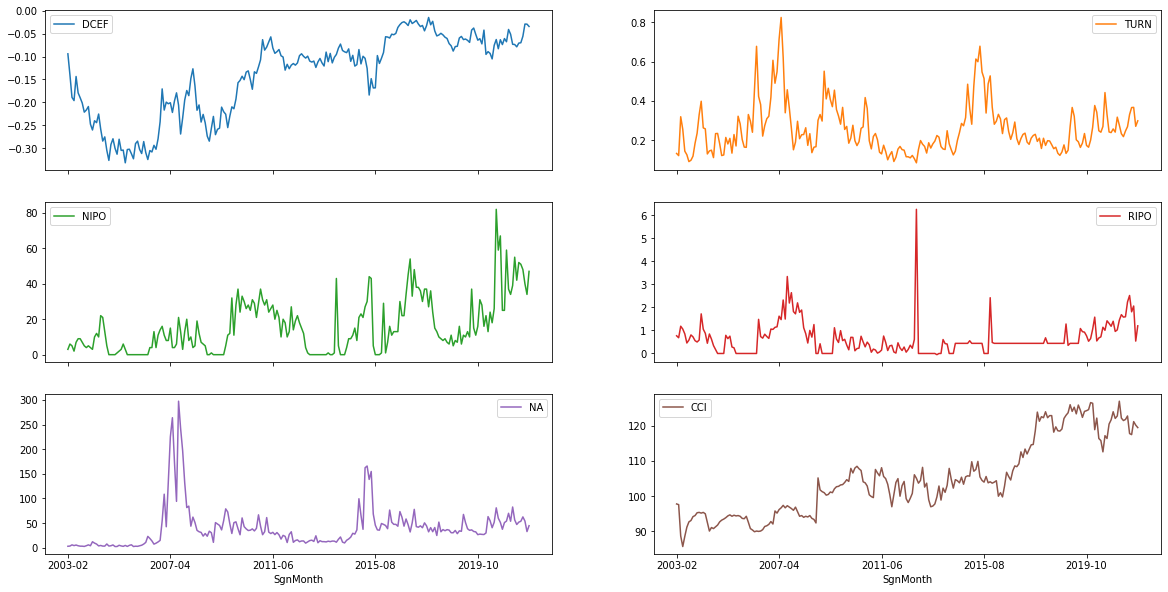

In [6]:
#数据可视化
result.plot(kind='line',x='SgnMonth',
 y=['DCEF', 'TURN', 'NIPO', 'RIPO','NA','CCI'], #6个变量可视化
 subplots=True, #多子图并存
 layout=(3, 2), #子图排列3行2列
 figsize=(20, 10)) #图布的尺寸

## 利用PCA生成情绪指标

参考Baker and Wurgler(2016) 通过两步法计算投资者情绪，该文章使用了六个指标(封闭式基金折价率CEFD，股票换手率TURN，IPO公司数量NIPO，IPO公司上市首日平均收益RIPO，股权融资占比SRate，股利溢价LogPDND) 。


此处因为数据可获得性并参考国内文献：{魏星集, 夏维力, 孙彤彤. 基于BW模型的A股市场投资者情绪测度研究[J]. 管理观察, 2014(33):71-73.}
使用了以下6个指标（封闭式基金折价率CEFD，股票换手率TURN，IPO公司数量NIPO，IPO公司上市首日平均收益RIPO，消费者信心CCI，新增开户数NA）


1, 首先选择这些指标t期和t-1期滞后项（一共12个变量），通过主成分分析提取第一主成分，构建一个临时指数，该指数为前述12个指标(6个指标及其滞后一期项)的线性组合。接下来对每一个指标，分别计算该指标和其滞后项与临时指数的相关系数，并挑出相关系数高的6个变量。
2， 使用挑出的6个变量，并再一次通过主成分分析提取他们的第一主成分，最后构建投资者情绪指标。

另外，构建出的投资者情绪指标可能包含经济周期的影响，为此Baker and Wurgler(2016)进一步使用多个反映经济周期的变量作为解释变量，投资者情绪指标作为被解释变量，通过回归取残差实现中性化处理，并最终对残差的协方差矩阵提取主成分因子作为排除了经济周期影响后的投资者情绪。


### 进行球状检验

 球形检验的假设：
 H0：相关系数矩阵为单位阵（即变量不相关）
 H1：相关系数矩阵不是单位阵（即变量间有相关关系）

In [7]:
# Bartlett's球状检验
columns = ['DCEF', 'TURN', 'NIPO', 'RIPO','NA','CCI','DCEF-1', 'TURN-1', 'NIPO-1', 'RIPO-1','NA-1','CCI-1']
factors = result[columns]

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(factors)
print(f"chi_square_value : {chi_square_value},   p_value : {p_value}")

chi_square_value : 2589.532310993663,   p_value : 0.0


### KMO（Kaiser-Meyer-Olkin)统计量
检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。

In [8]:
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
 
kmo_all, kmo_model = calculate_kmo(factors)
print(kmo_all)

[0.70800365 0.67755161 0.79033908 0.80504282 0.76444394 0.73037102
 0.7088774  0.66503822 0.78498284 0.74973655 0.77920985 0.72850547]


### 生成第一步临时 情绪指数

In [11]:
from sklearn import preprocessing #import StandardScaler

#1.进行标准化 去中心化
factors = preprocessing.scale(factors)
factors

array([[ 0.53477807, -0.97861199, -0.8368322 , ...,  0.38659595,
        -0.86544674, -0.66951863],
       [ 0.01835047, -1.06494897, -0.64091638, ...,  0.19146377,
        -0.80919061, -0.66011166],
       [-0.53754211,  0.48833184, -0.70622165, ...,  0.06798057,
        -0.8434536 , -0.67892561],
       ...,
       [ 1.26769933,  0.86193551,  1.57946299, ...,  1.68934375,
        -0.18412259,  1.19306264],
       [ 1.26544419,  0.10530959,  1.18763134, ...,  2.04988599,
         0.09113885,  1.54112076],
       [ 1.20906563,  0.32507645,  2.03659992, ..., -0.14007427,
         0.11915116,  1.447051  ]])

In [12]:
#查看数据信息
print(pd.DataFrame(factors).info())
print(pd.DataFrame(factors).describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       226 non-null    float64
 1   1       226 non-null    float64
 2   2       226 non-null    float64
 3   3       226 non-null    float64
 4   4       226 non-null    float64
 5   5       226 non-null    float64
 6   6       226 non-null    float64
 7   7       226 non-null    float64
 8   8       226 non-null    float64
 9   9       226 non-null    float64
 10  10      226 non-null    float64
 11  11      226 non-null    float64
dtypes: float64(12)
memory usage: 21.3 KB
None
                 0             1             2             3             4   \
count  2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02   
mean  -3.065395e-16 -2.252377e-16 -2.023946e-16 -1.395148e-16  1.376726e-16   
std    1.002220e+00  1.002220e+00  1.002220e+00  1.002220e+00  1.002220e+00   
min   -2.14884

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 只保留第一主成分
pca.fit(factors)

print(f"The amount of variance explained by each of the selected components. {pca.explained_variance_} ")
print("===============================================================================")
print(f"Percentage of variance explained by each of the selected components. {pca.explained_variance_ratio_}")
print("===============================================================================")
print(f"第一主成分 {pca.components_}")

The amount of variance explained by each of the selected components. [4.47605949] 
Percentage of variance explained by each of the selected components. [0.37135449]
第一主成分 [[0.40651009 0.00498328 0.35272776 0.13141008 0.16436858 0.41288383
  0.40563839 0.00647138 0.34922281 0.12422895 0.15480685 0.41183757]]


In [14]:
#np.around(pca.transform(factors),decimals=3)
Sentiment1 = np.around(pca.fit_transform(factors),decimals=2)
print(Sentiment1.T)


[[-0.95 -1.09 -1.74 -2.48 -2.3  -1.98 -2.04 -2.05 -2.2  -2.32 -2.25 -2.32
  -2.35 -2.12 -2.03 -2.2  -2.23 -2.28 -2.62 -3.15 -3.72 -3.74 -3.48 -3.5
  -3.45 -3.15 -3.05 -3.14 -3.36 -3.54 -3.5  -3.55 -3.69 -3.62 -3.42 -3.51
  -3.75 -3.73 -3.7  -3.84 -3.47 -3.24 -3.13 -3.03 -2.93 -2.28 -1.2  -1.1
  -1.2  -0.4   0.36  0.13 -0.56  0.08  1.2   0.69 -0.41 -0.62 -0.29 -0.43
  -0.72 -0.62 -1.04 -1.37 -1.54 -1.93 -2.15 -2.19 -2.72 -2.76 -2.28 -2.12
  -2.16 -2.35 -2.35 -2.06 -1.72 -1.36 -1.2  -1.32 -0.54 -0.37 -0.46  0.31
   0.4   0.63  0.89  0.63  0.65  0.57  0.51  0.59  0.42  0.45  0.68  0.75
   0.7   0.95  1.06  0.95  1.05  0.87  0.7   0.51 -0.08 -0.36 -0.43 -0.51
  -0.28 -0.06 -0.2  -0.19 -0.17 -0.36 -0.36 -0.41 -0.41  0.66  0.29 -0.94
  -0.73 -0.87 -1.09 -1.13 -1.41 -1.55 -1.41 -1.25 -1.06 -1.12 -1.06  0.19
   0.41 -0.31 -0.5  -0.79 -0.61 -0.19 -0.15 -0.1   0.    0.1   0.63  0.79
   1.2   1.88  1.81  1.9   1.77  0.32 -1.03 -0.9  -0.62 -0.17  0.65  0.46
   0.24  0.47  0.35  0.29  0.4   0.84  1

In [15]:
result_pca = result.join(pd.DataFrame(Sentiment1,columns=['Sentiment1']))

In [16]:
result_pca
# result_pca.to_excel("sentiment1.xlsx")

,SgnMonth,DCEF,DCEF-1,TURN,TURN-1,NIPO,NIPO-1,RIPO,RIPO-1,NA,NA-1,CCI,CCI-1,SRate,PDND,LogPDND,ISI,StdISI,StdExMacroISI,Sentiment1
0,2003-02,-0.0941,-0.1117,0.1328,0.1928,3,5.0,0.7691,0.9050,2.85,3.26,97.8,97.7,24.14,-0.1963,-0.0583,25.30,-0.95,-0.95,-0.95
1,2003-03,-0.1399,-0.0941,0.1218,0.1328,6,3.0,0.6831,0.7691,3.26,5.69,97.6,97.8,24.14,-0.1963,-0.0583,26.20,-1.13,-1.19,-1.09
2,2003-04,-0.1892,-0.1399,0.3197,0.1218,5,6.0,1.1853,0.6831,5.69,4.21,88.7,97.6,24.14,-0.1963,-0.0583,27.69,-1.01,-0.96,-1.74
3,2003-05,-0.1962,-0.1892,0.2558,0.3197,2,5.0,1.0623,1.1853,4.21,5.35,85.7,88.7,24.14,-0.1963,-0.0583,24.05,-0.74,-0.74,-2.48
4,2003-06,-0.1436,-0.1962,0.1444,0.2558,7,2.0,0.8507,1.0623,5.35,3.87,88.6,85.7,24.14,-0.1963,-0.0583,25.10,-1.14,-1.26,-2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-07,-0.0699,-0.0707,0.3309,0.2693,51,52.0,2.5215,2.2413,53.63,62.49,117.8,122.8,6.98,0,0,75.30,2.68,2.80,4.27
222,2021-08,-0.0557,-0.0699,0.3664,0.3309,48,51.0,1.8123,2.5215,62.49,53.94,117.5,117.8,6.98,0,0,78.85,2.45,2.43,3.97
223,2021-09,-0.0291,-0.0557,0.3673,0.3664,40,48.0,2.0634,1.8123,53.94,32.69,121.2,117.5,6.98,0,0,71.64,2.56,2.64,3.85
224,2021-10,-0.0293,-0.0291,0.2709,0.3673,34,40.0,0.5382,2.0634,32.69,44.58,120.2,121.2,6.98,0,0,56.82,1.34,1.31,3.46


array([[<AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>]], dtype=object)

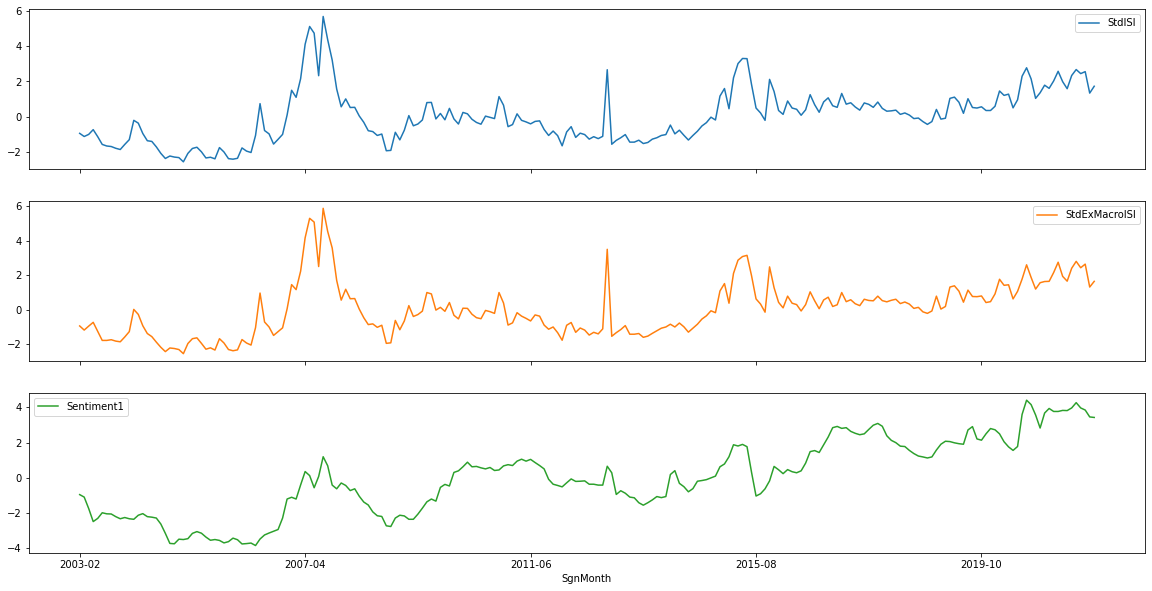

In [17]:
#数据可视化
result_pca.plot(kind='line',x='SgnMonth',
 y=['StdISI','StdExMacroISI', 'Sentiment1'], #2个变量可视化
 subplots=True, #多子图并存
 layout=(3, 1), #子图排列3行2列
 figsize=(20, 10)) #图布的尺寸

### 生成第二步情绪指数

In [18]:
sentiment_temp_columns = ['DCEF', 'TURN', 'NIPO', 'RIPO','NA','CCI',\
                          'DCEF-1', 'TURN-1', 'NIPO-1', 'RIPO-1','NA-1','CCI-1','Sentiment1']
sentiment_temp = result_pca[sentiment_temp_columns]
sentiment_temp

,DCEF,TURN,NIPO,RIPO,NA,CCI,DCEF-1,TURN-1,NIPO-1,RIPO-1,NA-1,CCI-1,Sentiment1
0,-0.0941,0.1328,3,0.7691,2.85,97.8,-0.1117,0.1928,5.0,0.9050,3.26,97.7,-0.95
1,-0.1399,0.1218,6,0.6831,3.26,97.6,-0.0941,0.1328,3.0,0.7691,5.69,97.8,-1.09
2,-0.1892,0.3197,5,1.1853,5.69,88.7,-0.1399,0.1218,6.0,0.6831,4.21,97.6,-1.74
3,-0.1962,0.2558,2,1.0623,4.21,85.7,-0.1892,0.3197,5.0,1.1853,5.35,88.7,-2.48
4,-0.1436,0.1444,7,0.8507,5.35,88.6,-0.1962,0.2558,2.0,1.0623,3.87,85.7,-2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.0699,0.3309,51,2.5215,53.63,117.8,-0.0707,0.2693,52.0,2.2413,62.49,122.8,4.27
222,-0.0557,0.3664,48,1.8123,62.49,117.5,-0.0699,0.3309,51.0,2.5215,53.94,117.8,3.97
223,-0.0291,0.3673,40,2.0634,53.94,121.2,-0.0557,0.3664,48.0,1.8123,32.69,117.5,3.85
224,-0.0293,0.2709,34,0.5382,32.69,120.2,-0.0291,0.3673,40.0,2.0634,44.58,121.2,3.46


In [19]:
sentiment_temp_corr = sentiment_temp.corr()
print(sentiment_temp_corr['Sentiment1'])
# 选取 当期与滞后一期中较大值 ，得到 DCEF,TURN-1,NIPO,RIPO ,NA,CCI

DCEF          0.858099
TURN          0.010689
NIPO          0.744571
RIPO          0.277523
NA            0.347125
CCI           0.871644
DCEF-1        0.856225
TURN-1        0.013793
NIPO-1        0.737039
RIPO-1        0.262332
NA-1          0.326853
CCI-1         0.869452
Sentiment1    1.000000
Name: Sentiment1, dtype: float64


In [20]:
sentiment2_columns = ['DCEF','TURN-1','NIPO','RIPO' ,'NA','CCI']
sentiment2 = result_pca[sentiment2_columns]

#1.进行标准化 去中心化
factors2 = preprocessing.scale(sentiment2)
print(factors2)

#查看数据信息
print(pd.DataFrame(factors2).info())
print(pd.DataFrame(factors2).describe())

[[ 0.53477807 -0.50383216 -0.8368322   0.18936516 -0.86910484 -0.6670626 ]
 [ 0.01835047 -0.97460599 -0.64091638  0.06602107 -0.85962871 -0.68581687]
 [-0.53754211 -1.06091453 -0.70622165  0.78629318 -0.80346532 -1.5203816 ]
 ...
 [ 1.26769933  0.85827347  1.57946299  2.0456937   0.31171304  1.52718624]
 [ 1.26544419  0.86533508  1.18763134 -0.14179938 -0.17942769  1.43341492]
 [ 1.20906563  0.10895845  2.03659992  0.80981461  0.09537999  1.367775  ]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       226 non-null    float64
 1   1       226 non-null    float64
 2   2       226 non-null    float64
 3   3       226 non-null    float64
 4   4       226 non-null    float64
 5   5       226 non-null    float64
dtypes: float64(6)
memory usage: 10.7 KB
None
                  0             1             2             3             4  \
count  2.260000e+02

In [21]:
pca2 = PCA(n_components=1) # 只保留第一主成分
pca2.fit(factors2)

print(f"The amount of variance explained by each of the selected components. {pca2.explained_variance_} ")
print("===============================================================================")
print(f"Percentage of variance explained by each of the selected components. {pca2.explained_variance_ratio_}")
print("===============================================================================")
print(f"第一主成分 {pca2.components_}")

The amount of variance explained by each of the selected components. [2.31764221] 
Percentage of variance explained by each of the selected components. [0.38456453]
第一主成分 [[0.53189943 0.07107356 0.51464309 0.24986035 0.2954634  0.54538538]]


In [22]:
Sentiment_index2 = np.around(pca2.fit_transform(factors2),decimals=2)
print(Sentiment_index2.T)

[[-0.76 -1.   -1.59 -1.83 -1.31 -1.54 -1.49 -1.55 -1.71 -1.74 -1.59 -1.8
  -1.41 -1.26 -1.39 -1.65 -1.49 -1.71 -2.04 -2.51 -2.81 -2.55 -2.47 -2.63
  -2.37 -2.1  -2.19 -2.26 -2.55 -2.54 -2.55 -2.53 -2.67 -2.52 -2.47 -2.66
  -2.7  -2.57 -2.75 -2.62 -1.75 -2.21 -1.89 -2.22 -1.82 -1.47 -0.5  -0.57
  -0.69 -0.17  0.95  0.78  0.72 -0.1   2.17  0.78  0.43  0.18  0.15 -0.18
  -0.32 -0.27 -0.83 -0.86 -1.18 -1.42 -1.51 -1.5  -2.36 -1.7  -1.47 -1.64
  -1.64 -1.48 -1.56 -1.28 -1.25 -0.52 -0.63 -0.71  0.13 -0.62  0.19  0.5
  -0.09  0.84  0.52  0.35  0.43  0.18  0.44  0.36  0.02  0.67  0.67  0.39
   0.2   0.97  0.51  0.58  0.63  0.34  0.46  0.09 -0.52 -0.3  -0.47 -0.62
  -0.24  0.01 -0.43 -0.16 -0.35 -0.45 -0.39 -0.5  -0.41  1.5  -0.91 -0.83
  -0.62 -0.93 -0.9  -1.09 -1.23 -1.28 -1.05 -1.05 -0.78 -1.11 -0.64  0.66
  -0.4  -0.33 -0.68 -0.85 -0.43 -0.2  -0.33 -0.03 -0.12 -0.18  0.92  0.7
   0.64  1.49  1.62  1.75  1.8  -0.19 -0.77 -0.35 -0.65  0.51  0.82 -0.01
   0.11  0.44  0.23  0.18  0.32  0.61  1.

In [23]:
result_pca_index2 = result_pca.join(pd.DataFrame(Sentiment_index2,columns=['Sentiment_index2']))
result_pca_index2.to_excel('sentiment_index2.xlsx')
result_pca_index2

,SgnMonth,DCEF,DCEF-1,TURN,TURN-1,NIPO,NIPO-1,RIPO,RIPO-1,NA,...,CCI,CCI-1,SRate,PDND,LogPDND,ISI,StdISI,StdExMacroISI,Sentiment1,Sentiment_index2
0,2003-02,-0.0941,-0.1117,0.1328,0.1928,3,5.0,0.7691,0.9050,2.85,...,97.8,97.7,24.14,-0.1963,-0.0583,25.30,-0.95,-0.95,-0.95,-0.76
1,2003-03,-0.1399,-0.0941,0.1218,0.1328,6,3.0,0.6831,0.7691,3.26,...,97.6,97.8,24.14,-0.1963,-0.0583,26.20,-1.13,-1.19,-1.09,-1.00
2,2003-04,-0.1892,-0.1399,0.3197,0.1218,5,6.0,1.1853,0.6831,5.69,...,88.7,97.6,24.14,-0.1963,-0.0583,27.69,-1.01,-0.96,-1.74,-1.59
3,2003-05,-0.1962,-0.1892,0.2558,0.3197,2,5.0,1.0623,1.1853,4.21,...,85.7,88.7,24.14,-0.1963,-0.0583,24.05,-0.74,-0.74,-2.48,-1.83
4,2003-06,-0.1436,-0.1962,0.1444,0.2558,7,2.0,0.8507,1.0623,5.35,...,88.6,85.7,24.14,-0.1963,-0.0583,25.10,-1.14,-1.26,-2.30,-1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-07,-0.0699,-0.0707,0.3309,0.2693,51,52.0,2.5215,2.2413,53.63,...,117.8,122.8,6.98,0,0,75.30,2.68,2.80,4.27,3.04
222,2021-08,-0.0557,-0.0699,0.3664,0.3309,48,51.0,1.8123,2.5215,62.49,...,117.5,117.8,6.98,0,0,78.85,2.45,2.43,3.97,2.85
223,2021-09,-0.0291,-0.0557,0.3673,0.3664,40,48.0,2.0634,1.8123,53.94,...,121.2,117.5,6.98,0,0,71.64,2.56,2.64,3.85,2.98
224,2021-10,-0.0293,-0.0291,0.2709,0.3673,34,40.0,0.5382,2.0634,32.69,...,120.2,121.2,6.98,0,0,56.82,1.34,1.31,3.46,2.04


array([[<AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>],
       [<AxesSubplot:xlabel='SgnMonth'>]], dtype=object)

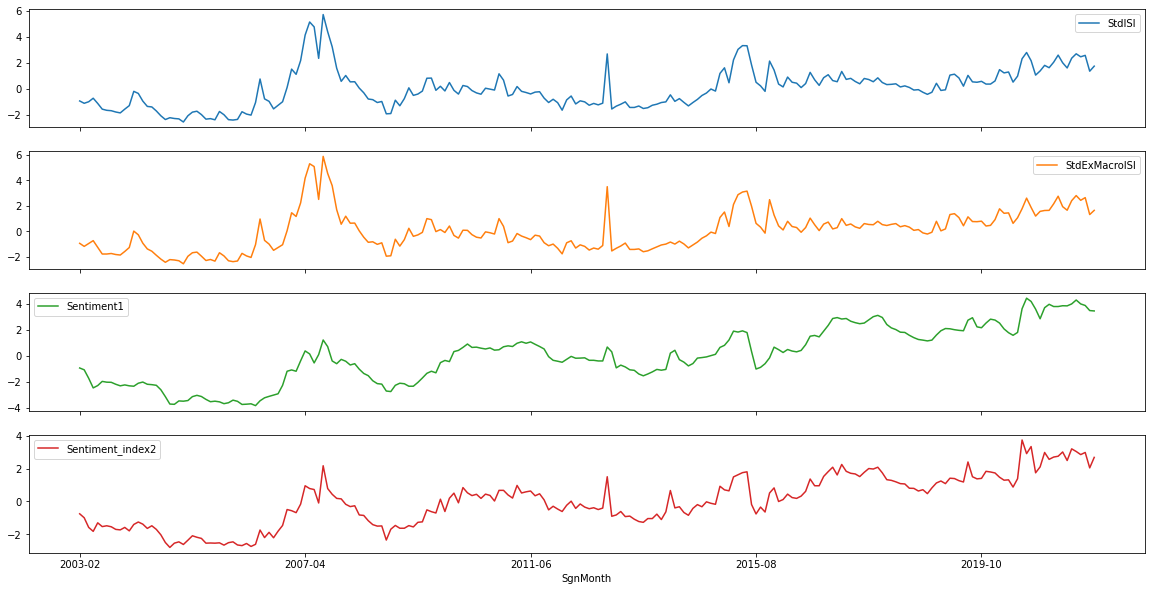

In [24]:
#数据可视化
result_pca_index2.plot(kind='line',x='SgnMonth',
 y=['StdISI','StdExMacroISI', 'Sentiment1','Sentiment_index2'], #2个变量可视化
 subplots=True, #多子图并存
 layout=(4, 1), #子图排列3行2列
 figsize=(20, 10)) #图布的尺寸

### 排除宏观因素影响